In [1]:
import torch
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ffn_color = '#8da0cb'
rnn_color = '#fc8d62'
tr_color = '#66c2a5'

In [3]:
matplotlib.rcdefaults()
matplotlib.rcParams['text.usetex'] = True

# 1STR

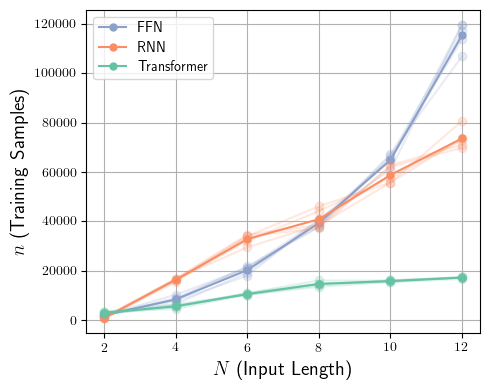

In [4]:
ffn_samples_all = torch.load('results/ffn_10_5000.pt')
rnn_samples_all = torch.load('results/rnn_10_5000.pt')
tr_samples_all = torch.load('results/tr_10_5000.pt')

ffn_samples_all = torch.tensor(ffn_samples_all, dtype=float)
rnn_samples_all = torch.tensor(rnn_samples_all, dtype=float)
tr_samples_all = torch.tensor(tr_samples_all, dtype=float)

ffn_samples_mean = ffn_samples_all.mean(dim=0)
ffn_samples_stds = ffn_samples_all.std(dim=0)
rnn_samples_mean = rnn_samples_all.mean(dim=0)
rnn_samples_stds = rnn_samples_all.std(dim=0)
tr_samples_mean = tr_samples_all.mean(dim=0)
tr_samples_stds = tr_samples_all.std(dim=0)

fig, ax = plt.subplots(figsize=(5, 4))

N_range = range(2, 13, 2)

ax.plot(N_range, ffn_samples_mean, label='FFN', marker='o', color=ffn_color, markersize=5)
for i in range(5):
    ax.plot(N_range, ffn_samples_all[i], marker='o', color=ffn_color, alpha=0.2)
ax.plot(N_range, rnn_samples_mean, label='RNN', marker='o', color=rnn_color, markersize=5)
for i in range(5):
    ax.plot(N_range, rnn_samples_all[i], marker='o', color=rnn_color, alpha=0.2)
ax.plot(N_range, tr_samples_mean, label='Transformer', marker='o', color=tr_color, markersize=5)
for i in range(5):
    ax.plot(N_range, tr_samples_all[i], marker='o', color=tr_color, alpha=0.2)
plt.grid()

ax.set_xlabel('$N$ (Input Length)', fontsize=14)
ax.set_ylabel('$n$ (Training Samples)', fontsize=14)
ax.legend()
plt.tight_layout()
plt.savefig('figures/n_vs_N.pdf')

# simple-1STR

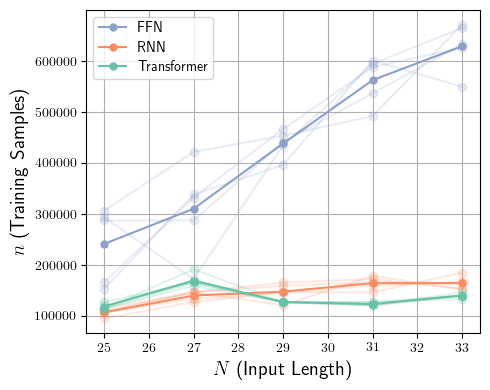

In [5]:
ffn_samples_all = torch.load('results/ffn_simple_100_5000.pt')
rnn_samples_all = torch.load('results/rnn_simple_100_5000.pt')
tr_samples_all = torch.load('results/tr_simple_100_5000.pt')

ffn_samples_all = torch.tensor(ffn_samples_all, dtype=float)
rnn_samples_all = torch.tensor(rnn_samples_all, dtype=float)
tr_samples_all = torch.tensor(tr_samples_all, dtype=float)

ffn_samples_mean = ffn_samples_all.mean(dim=0)
ffn_samples_stds = ffn_samples_all.std(dim=0)
rnn_samples_mean = rnn_samples_all.mean(dim=0)
rnn_samples_stds = rnn_samples_all.std(dim=0)
tr_samples_mean = tr_samples_all.mean(dim=0)
tr_samples_stds = tr_samples_all.std(dim=0)

fig, ax = plt.subplots(figsize=(5, 4))

N_range = range(25, 35, 2)

ax.plot(N_range, ffn_samples_mean, label='FFN', marker='o', color=ffn_color, markersize=5)
for i in range(5):
    ax.plot(N_range, ffn_samples_all[i], marker='o', color=ffn_color, alpha=0.2)
ax.plot(N_range, rnn_samples_mean, label='RNN', marker='o', color=rnn_color, markersize=5)
for i in range(5):
    ax.plot(N_range, rnn_samples_all[i], marker='o', color=rnn_color, alpha=0.2)
ax.plot(N_range, tr_samples_mean, label='Transformer', marker='o', color=tr_color, markersize=5)
for i in range(5):
    ax.plot(N_range, tr_samples_all[i], marker='o', color=tr_color, alpha=0.2)
plt.grid()

ax.set_xlabel('$N$ (Input Length)', fontsize=14)
ax.set_ylabel('$n$ (Training Samples)', fontsize=14)
ax.set_yticks([100000 * i for i in range(1, 7)])
ax.legend()
plt.tight_layout()
plt.savefig('figures/n_vs_N_simple.pdf')

# Attention Weights

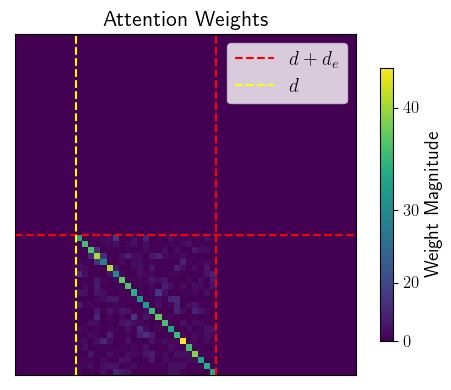

In [10]:
attn_proj = torch.load('results/attn_proj.pt')
N = 100
d = 10
de = int(np.log(N) * 5)

fig, ax = plt.subplots(figsize=(5, 4))

norm = matplotlib.colors.PowerNorm(gamma=2, vmin=attn_proj.abs().min(), vmax=attn_proj.abs().max())
plt.imshow(attn_proj.abs(), norm=norm)
plt.xticks([])
plt.yticks([])
plt.axhline(y = d + de - 0.5, label='$d + d_e$', linestyle='--', color='red')
plt.axvline(x = d - 0.5, label='$d$', linestyle='--', color='yellow')
plt.axvline(x = d + de - 0.5, linestyle='--', color='red')
plt.legend(fontsize=14)
cbar = plt.colorbar(shrink=0.8, ticks=[0, 20, 30, 40])
cbar.set_label('Weight Magnitude', fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.title('Attention Weights', fontsize=16)
plt.tight_layout()
plt.savefig('figures/attn_weights.pdf')
plt.show()